 Suponga que le han pedido averiguar si existe una relación entre
el número de veces que batean los jugadores de un equipo de béisbol y el
número de runs que consigue. En caso de existir y de establecer un modelo,
podría predecir el resultado del partido para los siguientes datos:


In [1]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland",
           "Arizona", "Toronto","Minnesota","Florida","Pittsburgh","Oakland",
           "Tampa", "Atlanta","Washington","San.F","San.I","Seattle"]

bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585,
          5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508,
          5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head()

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762


1. Obtenga la distribución de los datos

In [3]:
print(datos.describe())

            bateos        runs
count    30.000000   30.000000
mean   5523.500000  693.600000
std      79.873067   82.479088
min    5417.000000  556.000000
25%    5448.250000  629.000000
50%    5515.500000  705.500000
75%    5575.000000  734.000000
max    5710.000000  875.000000


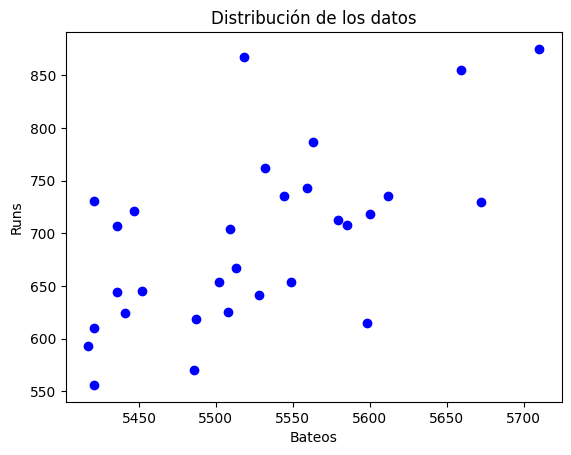

In [4]:
# graficar la distribución de los datos
plt.scatter(datos['bateos'], datos['runs'], color='blue')
plt.title('Distribución de los datos')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.show()

3. Separe sus datos de entrenamiento en 80/20.

In [5]:
X = datos['bateos']
y = datos['runs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento:")
print(X_train.shape)
print(y_train.shape)

print("Datos de prueba:")
print(X_test.shape)
print(y_test.shape)

Datos de entrenamiento:
(24,)
(24,)
Datos de prueba:
(6,)
(6,)


4. Ajuste un modelo de regresión lineal.

In [6]:
# ajustar el modelo
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

5. Escriba la recta de regresión que obtuvo con sus estimaciones
respectivas.

In [7]:
# Coeficientes de la recta de regresión
print("Coeficiente:", regresion_lineal.coef_)
print("Intercepto:", regresion_lineal.intercept_)

# Ecuación de la recta de regresión
print("Ecuación de la recta de regresión: y =", regresion_lineal.coef_[0], "* x +", regresion_lineal.intercept_)

Coeficiente: [0.66685087]
Intercepto: -2981.517212576021
Ecuación de la recta de regresión: y = 0.6668508650552262 * x + -2981.517212576021


7. Obtenga la gráfica de los datos y su recta de regresión

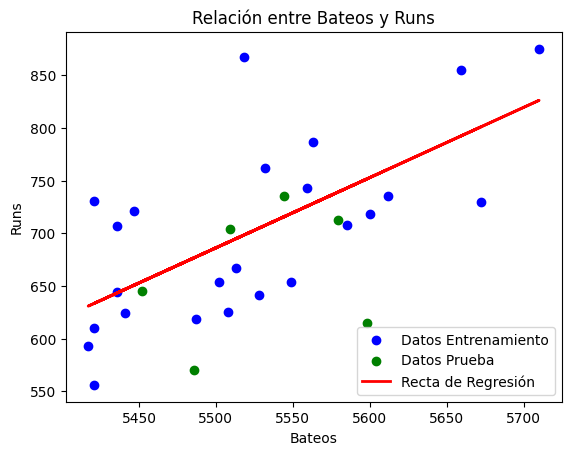

In [8]:
# Convertir los datos de entrenamiento a un arreglo de numpy
X = np.array(X).reshape(-1, 1)

# # Graficar los datos y la recta de regresión con datos de prueba y entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Datos Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos Prueba')
plt.plot(X, regresion_lineal.predict(X), color='red', linewidth=2, label='Recta de Regresión')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.title('Relación entre Bateos y Runs')
plt.legend()
plt.show()

8. Obtenga las métricas: MAE, MSE, RMSE.

In [9]:
# Obtener las predicciones con los datos de prueba
y_pred = regresion_lineal.predict(X_test.values.reshape(-1,1))

# Obtener las métricas

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 51.61164068147824
MSE: 5219.975632116472
RMSE: 72.24939883567525


Concluya a los datos obteniendo y comente la problemática que le han
planteado al principio.

Sí existe una relación lineal entre estas variables. Sin embargo, los resultados de las metricas (MAE, MSE, RMSE) indican que el modelo no es el más adecuado para predecir con precisión los runs basándose únicamente en el número de bateos y puede haber otros factores que influyan en la cantidad de runs obtenidos en un partido.

Sería necesario analizar y considerar otras variables relevantes para mejorar la calidad de las predicciones.